In [14]:
import cv2 as cv
%matplotlib inline
import glob
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

6929

Program for brokenrice
Total circles: 255
3051

Program for brokenrice
Total circles: 149
3336

Program for brokenrice
Total circles: 332
2124

Program for brokenrice
Total circles: 122
2581

Program for brokenrice
Total circles: 105
3841

Program for brokenrice
Total circles: 362
5099

Program for brokenrice
Total circles: 335
3819

Program for brokenrice
Total circles: 371
4589

Program for brokenrice
Total circles: 340
2879

Program for brokenrice
Total circles: 221
3693

Program for brokenrice
Total circles: 194
2417

Program for brokenrice
Total circles: 167


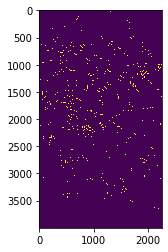

In [15]:
cv_img = []
for img in glob.glob("C:/Users/lalit/Downloads/data/train/*.jpg"):   #train dataset
    n= cv.imread(img,cv.IMREAD_GRAYSCALE)
    #n = cv.cvtColor(n, )
    kernelSize, C = 25,-10
    img_adapt_thresh = th2 = cv.adaptiveThreshold(n,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,kernelSize, C)
    #cv.imwrite()
#    cv_img.append(n)
    ksize = 3
    kernel = cv.getStructuringElement(cv.MORPH_RECT,(ksize,ksize))
    eroded_img = cv.erode(img_adapt_thresh, kernel)
    num_labels, labeledImg = cv.connectedComponents(eroded_img)
    num_grains = num_labels -1; print(num_grains)
    (minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(labeledImg)
# Normalize the image so the min value is 0 and max value is 255.
    labeledImg = (255/(maxVal-minVal)) * (labeledImg - minVal)
    imgColorMap = cv.applyColorMap(labeledImg.astype('uint8'), cv.COLORMAP_RAINBOW)
    imgColorMap[labeledImg==0] = 0
# Display colormapped labels
    plt.imshow(imgColorMap[::1])
    
    print()
    print("Program for brokenrice")
    windowSize = 41
    windowConstant = 60
    mask = cv.adaptiveThreshold(n, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, windowSize, windowConstant)
    plt.imshow(mask)

    stats = cv.connectedComponentsWithStats(mask, 8)[2]
    label_area = stats[1:, cv.CC_STAT_AREA]

    min_area, max_area = 345, max(list(label_area))  # min/max for a single circle
    singular_mask = (min_area < label_area) & (label_area <= max_area)
    circle_area = np.mean(label_area[singular_mask])

    n_circles = int(np.sum(np.round(label_area / circle_area)))

    print('Total circles:', n_circles)
        
    
#c

4473

Program for brokenrice
Total circles: 316
3408

Program for brokenrice
Total circles: 208
1756

Program for brokenrice
Total circles: 180
2741

Program for brokenrice
Total circles: 202
2879

Program for brokenrice
Total circles: 221


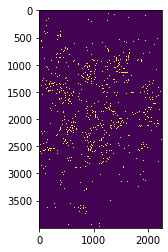

In [16]:
for img in glob.glob("C:/Users/lalit/Downloads/data/test/*.jpg"):    # test dataset
    final= cv.imread(img,cv.IMREAD_GRAYSCALE)
    #n = cv.cvtColor(n, )
    kernelSize, C = 25,-10
    img_adapt_thresh = th2 = cv.adaptiveThreshold(final,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,kernelSize, C)
    #cv.imwrite()
#    cv_img.append(n)
    ksize = 3
    kernel = cv.getStructuringElement(cv.MORPH_RECT,(ksize,ksize))
    eroded_img = cv.erode(img_adapt_thresh, kernel)
    num_labels, labeledImg = cv.connectedComponents(eroded_img)
    num_grains = num_labels -1; print(num_grains)
    (minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(labeledImg)
# Normalize the image so the min value is 0 and max value is 255.
    labeledImg = (255/(maxVal-minVal)) * (labeledImg - minVal)
# Applying the color map for better visulization
    imgColorMap = cv.applyColorMap(labeledImg.astype('uint8'), cv.COLORMAP_RAINBOW)
# Making the background black
    imgColorMap[labeledImg==0] = 0
# Display colormapped labels
    plt.imshow(imgColorMap[:,:,::-1])
    
    print()
    print("Program for brokenrice")
    windowSize = 41
    windowConstant = 60
    mask = cv.adaptiveThreshold(final, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, windowSize, windowConstant)
    plt.imshow(mask)

    stats = cv.connectedComponentsWithStats(mask, 8)[2]
    label_area = stats[1:, cv.CC_STAT_AREA]

    min_area, max_area = 345, max(list(label_area))  # min/max for a single circle
    singular_mask = (min_area < label_area) & (label_area <= max_area)
    circle_area = np.mean(label_area[singular_mask])

    n_circles = int(np.sum(np.round(label_area / circle_area)))

    print('Total circles:', n_circles)

#C:\Users\lalit\Downloads\data

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

In [8]:
import random

In [10]:
# Now trying differnt approach 

#IMG_SIZE = (224,224)
#train=[]
#DIR=r'C:\Users\lalit\Downloads\data\train'
#category=['broken_grain','full_grain']
#for c in category:
  #  folder=os.path.join(DIR,c)
   # label=category.index(c)
    #for img in os.listdir(folder):
     #   img_path=os.path.join(folder)
      #  img_ar=cv.imread(img_path)
       # img_ar=cv.resize(img_ar,IMG_SIZE)
       # train.append([img_ar,label])
#random.shuffle(train)
#X_train = []
#y_train = []
#for features, labels in train:
 #   X_train.append(features)
  #  y_train.append(labels)
#X_train = np.array(X_train)
#y_train = np.array(y_train)
#X_train = X_train



In [17]:
#model = Sequential()

#model.add(Conv2D(32, (3, 3), input_shape = X_train.shape[1:]))
#model.add(Activation('relu')) 
#model.add(MaxPooling2D(pool_size = (2, 2))) #max pooling layer of size 2x2

#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu')) #Rectified Linear Unit as Activation function
#model.add(MaxPooling2D(pool_size = (2, 2))) #max pooling layer of size 2x2

#third CNN layer with 64 layers and feature extractor of size 3x3
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu')) #Rectified Linear Unit as Activation function
#model.add(MaxPooling2D(pool_size = (2, 2))) #max pooling layer of size 2x2

#model.add(Flatten()) #Flattening to get 1D array of features
#model.add(Dense(64)) #defining the hidden layer with 64 neurons
#model.add(Activation('relu')) #Rectified Linear Unit as Activation function
#model.add(Dropout(0.5)) 
#model.add(Dense(2))
#model.add(Activation('softmax'))

#model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy']) #compiling the model with the given parameters

#model.fit(X_train, y_train, epochs = 10, validation_split = 0.1)
